In [1]:
import jax.numpy as np
from jax import grad
from scipy.special import factorial
import matplotlib.pyplot as plt

In [2]:
def TaylorSeries(f, x, x0, n = 2):
    ''' Computes the Taylor series approximation 
    of a function f around the point x0 
    using a polynomial of order n'''
    T = f(x0)*np.ones_like(x)
    grad_f = grad(f)
    for i in range(0, n):
        T += grad_f(x0)*(x-x0)**(i+1) / factorial(i+1)
        grad_f = grad(grad_f)
    return T 

In [3]:
def f(x):
    return np.sin(x) + np.cos(x)

In [16]:
N = 100
x = np.linspace(-4.0,4.0,N)
y = f(x)
x0 = 0.25
n = [0, 1, 5, 10]

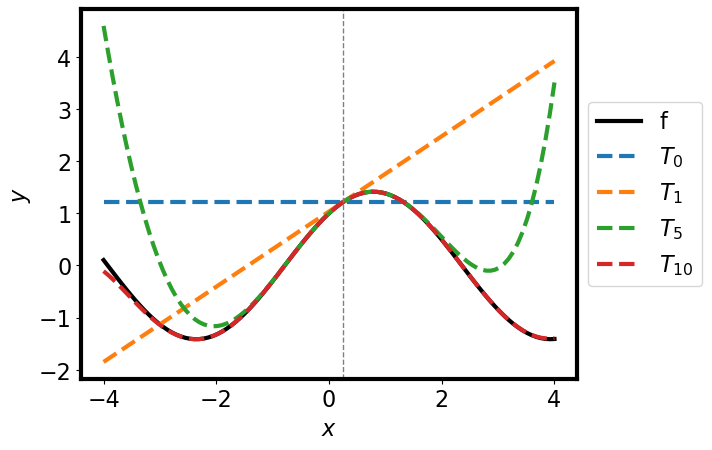

In [17]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.linewidth']=3

plt.figure(dpi=100)
plt.plot(x, y, 'k-', lw = 3, label = 'f')
for i in range(0, len(n)):
    T = TaylorSeries(f, x, x0, n[i])
    plt.plot(x, T, '--', lw = 3, label = '$T_{%d}$' % (n[i]))
plt.axvline(x0, c='gray', lw=1, linestyle='--')
plt.xlabel('$x$')
plt.ylabel('$y$')    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))